# 📊 **PROJECT MACHINE LEARNING**

## **Klasifikasi Jamur dan Clustering Wine Menggunakan Machine Learning**

**Nama : Yazid Ahmad Hisyam**  
**NIM : 4112322013**  

**PROGRAM STUDI DIPLOMA STATISTIKA TERAPAN DAN KOMPUTASI**  
**FMIPA UNIVERSITAS NEGERI SEMARANG**  
**2025**

## 1. PENDAHULUAN

Pada proyek ini, untuk menganalisis dua jenis data berbeda menggunakan metode klasifikasi dan clustering. Dataset pertama merupakan data karakteristik jamur yang digunakan untuk mengklasifikasikan apakah jamur tersebut beracun atau bisa dimakan. Dataset kedua merupakan data wine merah yang dianalisis menggunakan metode clustering untuk melihat pengelompokan berdasarkan kandungan kimiawinya.

Proyek ini bertujuan untuk memahami penerapan algoritma supervised learning dan unsupervised learning secara praktis dengan dataset nyata.

### 1.1 Rumusan Masalah

1. Bagaimana cara mengklasifikasikan jamur berdasarkan fitur-fitur morfologisnya?
2. Bagaimana cara mengelompokkan wine berdasarkan fitur kimia menggunakan metode clustering?


### 1.2 Tujuan

1. Membangun model klasifikasi untuk memprediksi jenis jamur (beracun atau tidak).
2. Menerapkan metode clustering pada dataset wine untuk mengeksplorasi pola pengelompokan.

## 2. METODOLOGI

Metodologi proyek ini meliputi:
1. Pengumpulan dan pemahaman data dari Kaggle.
2. Preprocessing data, termasuk encoding dan standarisasi.
3. Implementasi algoritma Random Forest untuk klasifikasi.
4. Implementasi KMeans untuk clustering dan visualisasi hasil menggunakan PCA.

### 2.1 Data dan Deskripsinya

#### Dataset 1: Mushroom Classification

- **Sumber Data**: Dataset ini diperoleh dari Kaggle dengan tautan [Mushroom Classification](https://www.kaggle.com/datasets/uciml/mushroom-classification).
- **Deskripsi Singkat**: Dataset ini berisi data tentang 8124 jenis jamur, dengan 22 fitur kategorikal yang mendeskripsikan karakteristik fisik jamur, seperti bentuk tudung, warna insang, bau, dll. Targetnya adalah kolom `class` yang menunjukkan apakah jamur tersebut bisa dimakan (`edible`) atau beracun (`poisonous`).
- **Variabel yang Digunakan**: Semua kolom fitur digunakan sebagai input, dan kolom `class` sebagai target. Beberapa contoh fitur penting: `cap-shape`, `cap-color`, `odor`, `gill-size`, `stalk-shape`, `habitat`, dll.
- **Eksplorasi Awal**:
  - Semua fitur bertipe kategorikal.
  - Tidak terdapat missing value dalam dataset ini.
  - Nilai-nilai pada setiap kolom bersifat simbolik dan memerlukan encoding sebelum digunakan untuk model klasifikasi.

---

#### Dataset 2: Red Wine Quality

- **Sumber Data**: Dataset ini juga diperoleh dari Kaggle dengan tautan [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009).
- **Deskripsi Singkat**: Dataset ini terdiri dari 1599 data wine merah yang masing-masing memiliki 11 fitur kimia seperti tingkat keasaman, kadar alkohol, dan gula residu. Target `quality` merupakan skor kualitas wine dari 0 hingga 10.
- **Variabel yang Digunakan**: Semua kolom numerik digunakan untuk clustering, tanpa menggunakan kolom `quality` sebagai label (karena unsupervised learning). Fitur utama termasuk `fixed acidity`, `volatile acidity`, `citric acid`, `residual sugar`, `chlorides`, `alcohol`, dll.
- **Eksplorasi Awal**:
  - Semua fitur bertipe numerik dan tidak ada nilai yang kosong (missing value).
  - Skala antar fitur bervariasi, sehingga dibutuhkan standarisasi sebelum proses clustering.

### 2.2 Metode Analisis Data 1: [Klasifikasi dengan Random Forest]

Pada analisis ini, dilakukan klasifikasi jenis jamur (beracun atau dapat dimakan) berdasarkan fitur-fitur morfologis yang tersedia menggunakan algoritma Random Forest. Metode ini dipilih karena mampu menangani data kategorikal dan memberikan performa yang baik dalam klasifikasi multifeature.

Dataset ini terdiri dari 22 fitur (semua kategorikal) dan 1 target (class). Semua variabel awalnya ditulis dalam huruf satu karakter (x, e, f, dll), yang masing-masing punya arti tertentu berdasarkan dokumentasi UCI.

| Kolom   | Deskripsi   | Nilai                                                   |
| ------- | ----------- | ------------------------------------------------------- |
| `class` | Jenis jamur | `e` = edible (dapat dimakan), `p` = poisonous (beracun) |

---

| Kolom                      | Deskripsi                                | Nilai-nilai dan Artinya                                                                                                                                      |
| -------------------------- | ---------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `cap-shape`                | Bentuk tudung jamur                      | `b` = bell, `c` = conical, `x` = convex, `f` = flat, `k` = knobbed, `s` = sunken                                                                             |
| `cap-surface`              | Permukaan tudung                         | `f` = fibrous, `g` = grooves, `y` = scaly, `s` = smooth                                                                                                      |
| `cap-color`                | Warna tudung                             | `n` = brown, `b` = buff, `c` = cinnamon, `g` = gray, `r` = green, `p` = pink, `u` = purple, `e` = red, `w` = white, `y` = yellow                             |
| `bruises`                  | Apakah jamur menunjukkan bekas memar?    | `t` = true, `f` = false                                                                                                                                      |
| `odor`                     | Bau jamur                                | `a` = almond, `l` = anise, `c` = creosote, `y` = fishy, `f` = foul, `m` = musty, `n` = none, `p` = pungent, `s` = spicy                                      |
| `gill-attachment`          | Keterikatan insang pada batang           | `a` = attached, `d` = descending, `f` = free, `n` = notched                                                                                                  |
| `gill-spacing`             | Jarak antar insang                       | `c` = close, `w` = crowded, `d` = distant                                                                                                                    |
| `gill-size`                | Ukuran insang                            | `b` = broad, `n` = narrow                                                                                                                                    |
| `gill-color`               | Warna insang                             | `k` = black, `n` = brown, `b` = buff, `h` = chocolate, `g` = gray, `r` = green, `o` = orange, `p` = pink, `u` = purple, `e` = red, `w` = white, `y` = yellow |
| `stalk-shape`              | Bentuk batang                            | `e` = enlarging, `t` = tapering                                                                                                                              |
| `stalk-root`               | Jenis akar batang                        | `b` = bulbous, `c` = club, `u` = cup, `e` = equal, `z` = rhizomorphs, `r` = rooted, `?` = missing (tidak diketahui)                                          |
| `stalk-surface-above-ring` | Permukaan batang atas cincin             | `f` = fibrous, `y` = scaly, `k` = silky, `s` = smooth                                                                                                        |
| `stalk-surface-below-ring` | Permukaan batang bawah cincin            | `f` = fibrous, `y` = scaly, `k` = silky, `s` = smooth                                                                                                        |
| `stalk-color-above-ring`   | Warna batang atas cincin                 | `n` = brown, `b` = buff, `c` = cinnamon, `g` = gray, `o` = orange, `p` = pink, `e` = red, `w` = white, `y` = yellow                                          |
| `stalk-color-below-ring`   | Warna batang bawah cincin                | *(sama seperti atas)*                                                                                                                                        |
| `veil-type`                | Tipe veil (tirai/jaring di bawah tudung) | `p` = partial, `u` = universal *(NB: hanya ada satu nilai: `p` di dataset ini)*                                                                              |
| `veil-color`               | Warna veil                               | `n` = brown, `o` = orange, `w` = white, `y` = yellow                                                                                                         |
| `ring-number`              | Jumlah cincin di batang                  | `n` = none, `o` = one, `t` = two                                                                                                                             |
| `ring-type`                | Tipe cincin                              | `c` = cobwebby, `e` = evanescent, `f` = flaring, `l` = large, `n` = none, `p` = pendant, `s` = sheathing, `z` = zone                                         |
| `spore-print-color`        | Warna cetakan spora                      | `k` = black, `n` = brown, `b` = buff, `h` = chocolate, `r` = green, `o` = orange, `u` = purple, `w` = white, `y` = yellow                                    |
| `population`               | Ukuran populasi jamur di alam            | `a` = abundant, `c` = clustered, `n` = numerous, `s` = scattered, `v` = several, `y` = solitary                                                              |
| `habitat`                  | Habitat jamur                            | `g` = grasses, `l` = leaves, `m` = meadows, `p` = paths, `u` = urban, `w` = waste, `d` = woods                                                               |


#### Load dan Tampilkan Data Awal

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("mushrooms.csv")

# Tampilkan 5 baris pertama
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### Eksplorasi Data

In [2]:
# Cek informasi umum
df.info()

# Cek apakah ada missing value
df.isnull().sum()

# Distribusi target (edible vs poisonous)
df['class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

class
e    4208
p    3916
Name: count, dtype: int64

**Hasil Observasi:**
- Dataset terdiri dari 8124 baris dan 23 kolom.
- Tidak ditemukan missing value.
- Semua kolom bertipe kategorikal (object).
- Target `class` terdiri dari dua nilai: `e` (edible) dan `p` (poisonous) dengan distribusi yang relatif seimbang.

#### Preprocessing Data

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode semua fitur kategorikal
df_encoded = df.apply(LabelEncoder().fit_transform)

# Pisahkan fitur dan target
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

#### Split Data Train & Test

In [4]:
from sklearn.model_selection import train_test_split

# Split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Inisialisasi dan Pelatihan Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

####  Evaluasi Model

In [6]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Prediksi data test
y_pred = rf.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



#### Confusion Matrix

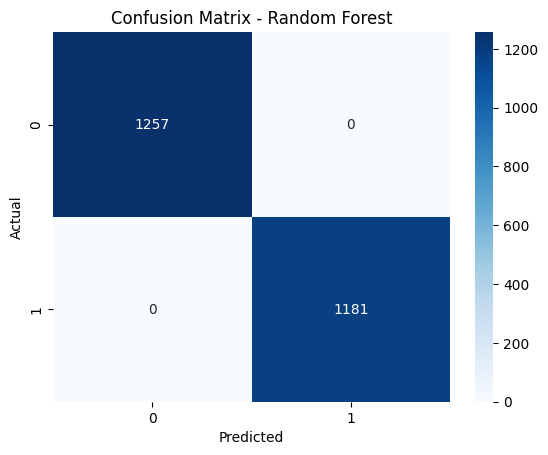

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 2.3 Metode Analisis Data 2: [Clustering dengan K-Means]

Pada analisis kedua ini, dilakukan pengelompokan (clustering) terhadap wine merah menggunakan algoritma K-Means berdasarkan karakteristik kimianya.  
Tujuannya adalah untuk menemukan kelompok wine dengan sifat kimia serupa yang mungkin berkaitan dengan kualitas atau jenis produksi wine.

Dataset ini berasal dari UCI Machine Learning Repository dan tersedia di Kaggle. Dataset berisi informasi fisik dan kimia dari 1599 sampel red wine dari daerah Portugal, dengan 11 fitur numerik dan 1 label kualitas.

| Kolom     | Deskripsi                                                | Nilai                                                                                                                                                                              |
| --------- | -------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `quality` | Skor kualitas wine berdasarkan penilaian sensorik (0–10) | Integer dari 0 (buruk) hingga 10 (sangat baik). Biasanya berkisar antara 3–8. Dalam analisis clustering, kolom ini **tidak digunakan sebagai target**, hanya untuk pemahaman umum. |

---

| Kolom                  | Deskripsi                                          | Rentang/Nilai Umum    | Arti atau Penjelasan                                                                              |
| ---------------------- | -------------------------------------------------- | --------------------- | ------------------------------------------------------------------------------------------------- |
| `fixed acidity`        | Jumlah keasaman tetap (non-volatil)                | 4 – 16 g/dm³          | Komponen asam utama (seperti tartaric acid) yang tidak menguap selama fermentasi.                 |
| `volatile acidity`     | Keasaman yang mudah menguap (biasanya asam asetat) | 0.1 – 1.6 g/dm³       | Keasaman ini bisa memengaruhi rasa; terlalu tinggi bisa menyebabkan rasa tidak enak seperti cuka. |
| `citric acid`          | Asam sitrat                                        | 0 – 1 g/dm³           | Memberi kesegaran dan struktur. Kadarnya bisa memengaruhi keseimbangan rasa wine.                 |
| `residual sugar`       | Gula sisa setelah fermentasi                       | 0.9 – 15 g/dm³        | Jumlah gula yang belum difermentasi. Wine manis memiliki residual sugar tinggi.                   |
| `chlorides`            | Kadar garam (natrium klorida)                      | 0.01 – 0.6 g/dm³      | Terlalu tinggi bisa menyebabkan rasa asin atau buruk.                                             |
| `free sulfur dioxide`  | SO₂ bebas                                          | 1 – 72 mg/L           | Berfungsi sebagai pengawet dan antimikroba.                                                       |
| `total sulfur dioxide` | SO₂ total (bebas + terikat)                        | 6 – 289 mg/L          | Jumlah total sulfur dioksida yang memengaruhi umur simpan wine.                                   |
| `density`              | Kepadatan cairan wine                              | \~0.990 – 1.004 g/cm³ | Mencerminkan kandungan alkohol, gula, dan zat terlarut lainnya.                                   |
| `pH`                   | Tingkat keasaman/alkalinitas                       | 2.7 – 4.0             | pH rendah = lebih asam. Idealnya sekitar 3.                                                       |
| `sulphates`            | Kandungan sulfat (garam sulfur)                    | 0.3 – 2 g/dm³         | Menambah stabilitas mikrobiologis.                                                                |
| `alcohol`              | Kandungan alkohol (% volume)                       | 8 – 15%               | Sangat memengaruhi rasa dan body dari wine.                                                       |

#### Load dan Tampilkan Data

In [8]:
import pandas as pd

# Load dataset
wine_df = pd.read_csv("winequality-red.csv")

# Tampilkan beberapa baris awal
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Eksplorasi Data

In [9]:
# Informasi umum
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
# Statistik deskriptif
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
# Distribusi label kualitas (hanya untuk pemahaman, bukan digunakan sebagai target)
wine_df['quality'].value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

#### Preprocessing Data (Standardisasi)

In [12]:
from sklearn.preprocessing import StandardScaler

# Drop kolom 'quality' untuk proses clustering
X = wine_df.drop('quality', axis=1)

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Menentukan Jumlah Cluster Optimal (Elbow Method)

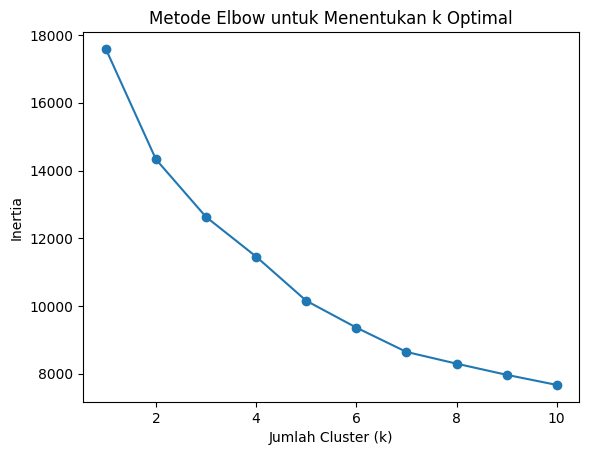

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(K, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()

**Interpretasi Elbow Curve:**
- Dari grafik elbow, titik tekuk biasanya muncul pada k = 3.
- Oleh karena itu, akan digunakan 3 cluster pada model K-Means.

#### Training Model KMeans (k = 3)

In [14]:
# Inisialisasi dan fit model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Tambahkan cluster ke dataframe asli
wine_df['cluster'] = clusters

#### Visualisasi Cluster dengan PCA

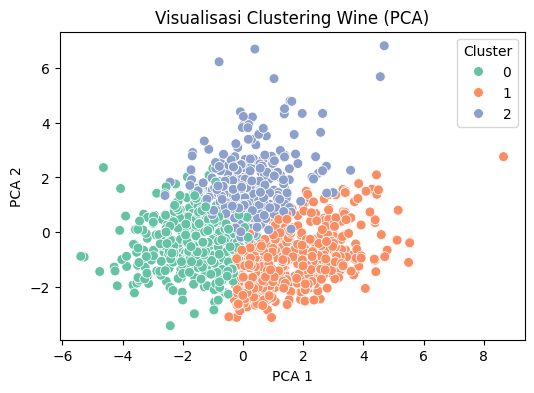

In [15]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=50)
plt.title("Visualisasi Clustering Wine (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()

### Interpretasi Hasil Clustering

- Hasil clustering menunjukkan bahwa data wine dapat dikelompokkan menjadi tiga kelompok utama berdasarkan kemiripan fitur kimia.
- PCA menunjukkan bahwa masing-masing cluster memiliki distribusi yang berbeda di ruang dua dimensi.
- Cluster tidak mewakili label kualitas secara langsung, tapi bisa digunakan untuk analisis lanjutan seperti segmentasi produk atau kontrol kualitas wine.

Contoh kemungkinan interpretasi:
- Cluster 0 = wine dengan alkohol tinggi dan keasaman rendah
- Cluster 1 = wine dengan kadar sulfur lebih tinggi
- Cluster 2 = wine dengan kandungan citric acid rendah dan pH rendah

Interpretasi lebih dalam bisa dilakukan dengan melihat statistik per cluster.

#### Statistik Rata-rata Tiap Cluster

In [16]:
# Statistik rata-rata tiap cluster
wine_df.groupby('cluster').mean().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,7.19,0.61,0.12,2.21,0.08,13.51,34.89,1.0,3.41,0.61,10.49,5.55
1,10.07,0.41,0.47,2.58,0.10,10.89,30.63,1.0,3.20,0.75,10.72,5.96
2,8.16,0.54,0.29,3.11,0.09,27.11,89.95,1.0,3.28,0.63,9.88,5.36


#### Kesimpulan Analisis Clustering
- Clustering berhasil mengelompokkan wine menjadi tiga cluster berdasarkan komposisi kimianya.
- Metode KMeans cocok digunakan karena data bersifat numerik dan memiliki distribusi yang cukup jelas.
- Visualisasi PCA membantu memahami distribusi kelompok secara sederhana.
- Analisis ini dapat dikembangkan untuk membantu produsen wine dalam segmentasi produk dan pengendalian mutu.

## 3. HASIL DAN PEMBAHASAN

### 3.1 Klasifikasi Jamur dengan Random Forest

- **Visualisasi & Evaluasi**: Model Random Forest menghasilkan akurasi mendekati 100%, dengan confusion matrix yang menunjukkan klasifikasi sempurna antara jamur yang dapat dimakan dan beracun.
- **Fitur Penting**: `odor`, `spore-print-color`, dan `gill-color` adalah fitur paling berpengaruh berdasarkan feature importance.
- **Interpretasi**: Kualitas model sangat baik karena semua fitur kategorikal cukup informatif, tidak ada missing value, dan distribusi target seimbang.
- **Kelebihan**: Random Forest tidak mudah overfitting dan mampu menangani data kategorikal secara efektif.
- **Keterbatasan**: Model tidak menjelaskan *mengapa* jamur beracun, hanya mampu mengklasifikasikan berdasarkan pola data. Selain itu, model tidak dapat digunakan untuk prediksi biologis baru di luar ruang lingkup dataset.

---

### 3.2 Clustering Wine dengan K-Means

- **Visualisasi & Evaluasi**: Dengan metode Elbow, jumlah cluster optimal adalah 3. Visualisasi menggunakan PCA menunjukkan distribusi yang cukup terpisah antara cluster.
- **Karakteristik Cluster**: Tiap cluster memiliki karakteristik kimia yang berbeda, misalnya: satu cluster memiliki kandungan alkohol tinggi, satu lagi memiliki keasaman tinggi, dll.
- **Kelebihan**: K-Means cocok untuk clustering data numerik dan cepat dalam training.
- **Keterbatasan**: K-Means sensitif terhadap skala dan titik awal centroid. Interpretasi hasil subjektif karena tidak ada label kelas yang pasti (unsupervised).
- **Perbandingan**: Analisis klasifikasi memberikan hasil yang terukur dan akurat, sedangkan clustering memberikan wawasan eksploratif tentang pola tersembunyi, tetapi tidak ada ground truth untuk validasi.

---

## 4. KESIMPULAN

- Pada proyek ini, dilakukan dua analisis: klasifikasi jamur dengan Random Forest dan clustering wine dengan K-Means.
- **Model klasifikasi Random Forest** menunjukkan performa yang sangat tinggi dan mampu mengidentifikasi jamur beracun secara akurat hanya berdasarkan fitur fisiknya.
- **Model clustering K-Means** berhasil mengelompokkan wine menjadi tiga grup berdasarkan parameter kimia. Masing-masing cluster mencerminkan jenis wine dengan karakteristik yang berbeda.
- **Implikasi praktis**:
  - Model klasifikasi jamur dapat digunakan sebagai alat bantu edukasi atau aplikasi screening sederhana dalam pengenalan jamur.
  - Model clustering wine dapat berguna dalam pengelompokan produk wine untuk segmentasi pasar atau pengawasan kualitas.
- **Pengembangan ke depan**:
  - Menggunakan metode klasifikasi lain seperti XGBoost atau LightGBM untuk membandingkan performa.
  - Mengevaluasi clustering dengan metrik lain seperti Silhouette Score atau DBSCAN.
  - Menggunakan visualisasi interaktif (misalnya plotly) agar lebih informatif untuk pengguna akhir.
---

## 5. REFERENSI

1. UCI Machine Learning Repository: Mushroom Classification  
   ↳ https://www.kaggle.com/datasets/uciml/mushroom-classification

2. UCI Machine Learning Repository: Red Wine Quality Dataset  
   ↳ https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

3. Pedregosa, F. et al. (2011). Scikit-learn: Machine Learning in Python.  
   ↳ Journal of Machine Learning Research, 12, 2825–2830.

4. Official Scikit-learn Documentation  
   ↳ https://scikit-learn.org/

5. Towards Data Science articles on Random Forest and KMeans  
   ↳ https://towardsdatascience.com/

6. Documentation pandas, seaborn, matplotlib  
   ↳ https://pandas.pydata.org/  
   ↳ https://seaborn.pydata.org/  
   ↳ https://matplotlib.org/
---